### Задание 1

#### a) Разделите датасет на 2 выборки (train, test) из 100 человек, с сохранением пропорции полов.

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from scipy import stats as sts
from sklearn import model_selection, linear_model
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Davis.csv')
df.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

Преобразуем столбец "sex" к бинарному виду: M ~ 0, F ~ 1.

In [5]:
def binary_sex(x):
    if x == 'M':
        return 0
    elif x == 'F':
        return 1
    
    
df.sex = df.sex.apply(binary_sex)

In [6]:
df.head()

,sex,weight,height,repwt,repht
0,0,77,182,77.0,180.0
1,1,58,161,51.0,159.0
2,1,53,161,54.0,158.0
3,0,68,177,70.0,175.0
4,1,59,157,59.0,155.0


Разобьем исходную выборку на train и test, сохраняя баланс классов.

In [7]:
train, test = model_selection.train_test_split(df, train_size=0.5, stratify=df.sex, shuffle=True, random_state=7)

#### б) Очистите выборки от выбросов - людей с нереалистичным ростом/весом.

In [8]:
for i in train.index:
    if np.isnan(train.loc[i, 'repwt']):
        train.loc[i, 'repwt'] = train.loc[i, 'weight'] + 2 * np.sin(np.sqrt(7) * i)
    if np.isnan(train.loc[i, 'repht']):
        train.loc[i, 'repht'] = train.loc[i, 'height'] + 2 * np.sin(np.sqrt(11) * i)
train.repwt = train.repwt.apply(int)
train.repht = train.repht.apply(int)

In [9]:
train.head()

,sex,weight,height,repwt,repht
59,0,57,173,58,170
24,1,54,171,59,168
111,0,79,179,79,171
41,0,80,178,80,178
55,0,65,176,64,172


In [10]:
for i in test.index:
    if np.isnan(test.loc[i, 'repwt']):
        test.loc[i, 'repwt'] = test.loc[i, 'weight'] + 2 * np.sin(np.sqrt(7) * i)
    if np.isnan(test.loc[i, 'repht']):
        test.loc[i, 'repht'] = test.loc[i, 'height'] + 2 * np.sin(np.sqrt(11) * i)
test.repwt = test.repwt.apply(int)
test.repht = test.repht.apply(int)

In [11]:
test.head()

,sex,weight,height,repwt,repht
156,0,69,172,68,174
108,1,64,166,64,165
84,1,56,170,56,170
75,1,50,171,49,169
15,1,65,166,66,165


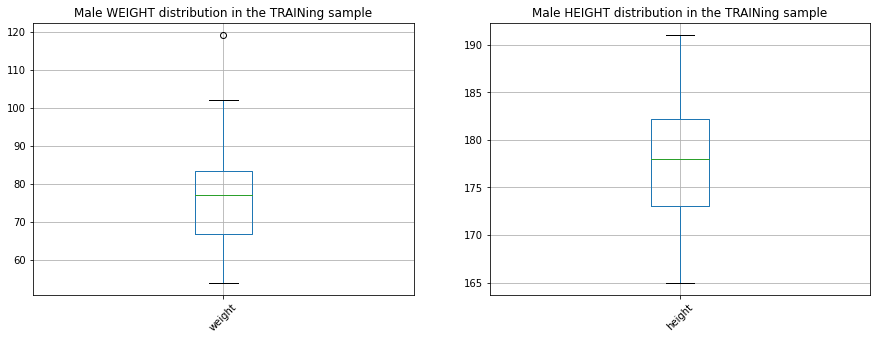

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
train[train.sex == 0].boxplot('weight', rot=45, ax=axes[0])
train[train.sex == 0].boxplot('height', rot=45, ax=axes[1])
axes[0].set_title('Male WEIGHT distribution in the TRAINing sample')
axes[1].set_title('Male HEIGHT distribution in the TRAINing sample')
plt.show()

In [13]:
train.drop(train.index[(train['weight'] > 115) & (train['sex'] == 0)], axis=0, inplace=True)

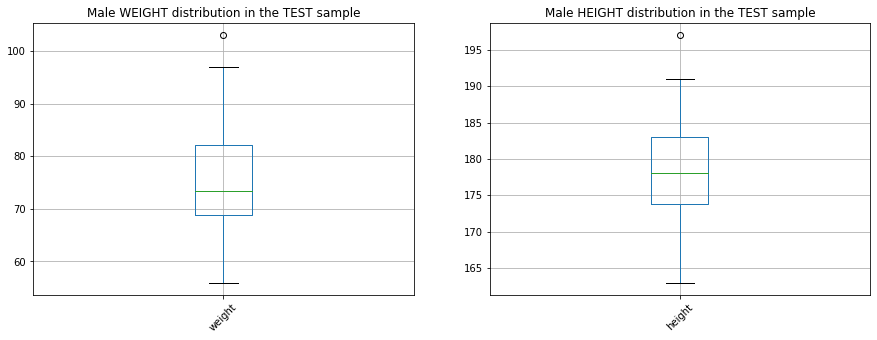

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
test[test.sex == 0].boxplot('weight', rot=45, ax=axes[0])
test[test.sex == 0].boxplot('height', rot=45, ax=axes[1])
axes[0].set_title('Male WEIGHT distribution in the TEST sample')
axes[1].set_title('Male HEIGHT distribution in the TEST sample')
plt.show()

In [15]:
test.drop(test.index[(test['weight'] > 100) & (test['sex'] == 0)], axis=0, inplace=True)
test.drop(test.index[(test['height'] > 195) & (test['sex'] == 0)], axis=0, inplace=True)

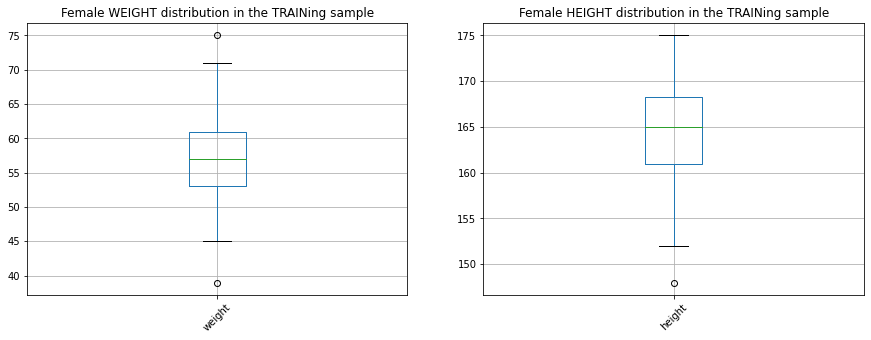

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
train[train.sex == 1].boxplot('weight', rot=45, ax=axes[0])
train[train.sex == 1].boxplot('height', rot=45, ax=axes[1])
axes[0].set_title('Female WEIGHT distribution in the TRAINing sample')
axes[1].set_title('Female HEIGHT distribution in the TRAINing sample')
plt.show()

In [17]:
train.drop(train.index[((train['weight'] > 73) | (train['weight'] < 42)) & (train['sex'] == 1)], axis=0, inplace=True)
train.drop(train.index[(train['height'] < 150) & (train['sex'] == 1)], axis=0, inplace=True)

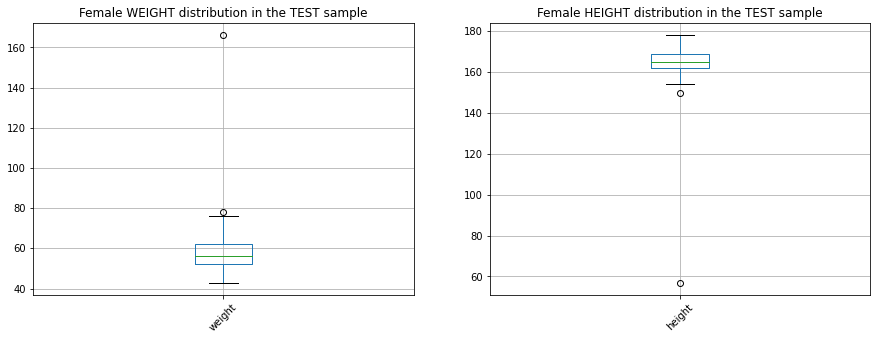

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
test[test.sex == 1].boxplot('weight', rot=45, ax=axes[0])
test[test.sex == 1].boxplot('height', rot=45, ax=axes[1])
axes[0].set_title('Female WEIGHT distribution in the TEST sample')
axes[1].set_title('Female HEIGHT distribution in the TEST sample')
plt.show()

In [19]:
test.drop(test.index[(test['weight'] > 76) & (test['sex'] == 1)], axis=0, inplace=True)
test.drop(test.index[(test['height'] < 152) & (test['sex'] == 1)], axis=0, inplace=True)

#### в) Отобразите train-выборку на в виде точек на графике.

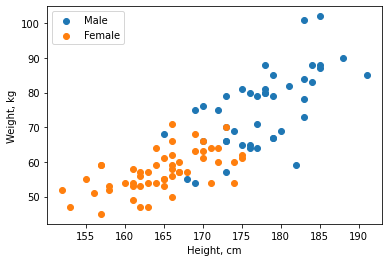

In [20]:
plt.scatter(train[train.sex == 0].height, train[train.sex == 0].weight)
plt.scatter(train[train.sex == 1].height, train[train.sex == 1].weight)
plt.xlabel('Height, cm')
plt.ylabel('Weight, kg')
plt.legend(['Male', 'Female'])
plt.show()

#### г) Постройте гистограммы:

- Роста и веса (в целом, только женщины, только мужчины)

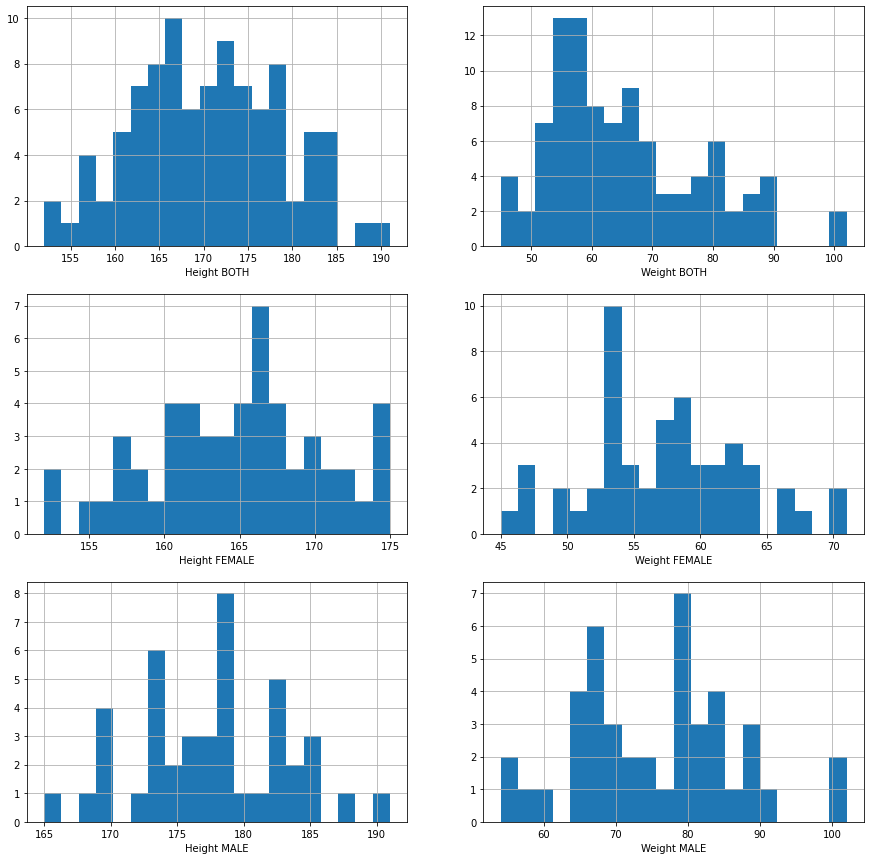

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

train['height'].hist(bins=20, ax=axes[0, 0])
train['weight'].hist(bins=20, ax=axes[0, 1])

train[train.sex == 1].height.hist(bins=20, ax=axes[1, 0])
train[train.sex == 1].weight.hist(bins=20, ax=axes[1, 1])

train[train.sex == 0].height.hist(bins=20, ax=axes[2, 0])
train[train.sex == 0].weight.hist(bins=20, ax=axes[2, 1])

s1 = ['Height ', 'Weight ']
s2 = ['BOTH', 'FEMALE', 'MALE']

for i, feauture in enumerate(s1):
    for j, sex in enumerate(s2):
        axes[j, i].set_xlabel(feauture + sex)

- Величины (repwt - weight) (в целом, только женщины, только мужчины)

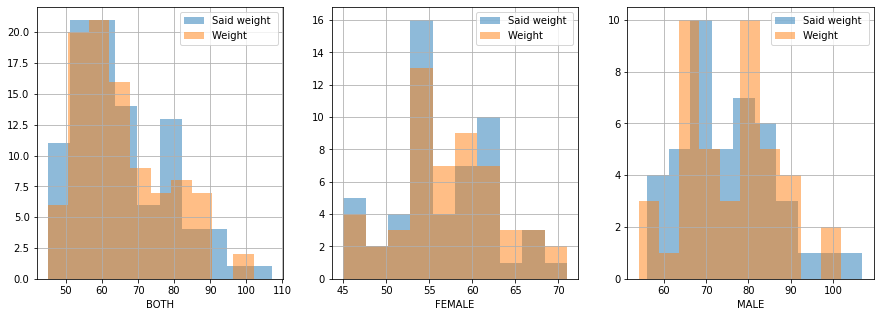

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

train['repwt'].hist(bins=10, ax=axes[0], alpha=0.5)
train['weight'].hist(bins=10, ax=axes[0], alpha=0.5)

train[train.sex == 1].repwt.hist(bins=10, ax=axes[1], alpha=0.5)
train[train.sex == 1].weight.hist(bins=10, ax=axes[1], alpha=0.5)

train[train.sex == 0].repwt.hist(bins=10, ax=axes[2], alpha=0.5)
train[train.sex == 0].weight.hist(bins=10, ax=axes[2], alpha=0.5)

s1 = ['Said weight ', 'Weight ']
s2 = ['BOTH', 'FEMALE', 'MALE']

for j, sex in enumerate(s2):
    axes[j].set_xlabel(sex)
    axes[j].legend(s1)

- Величины (repht - height) (в целом, только женщины, только мужчины)

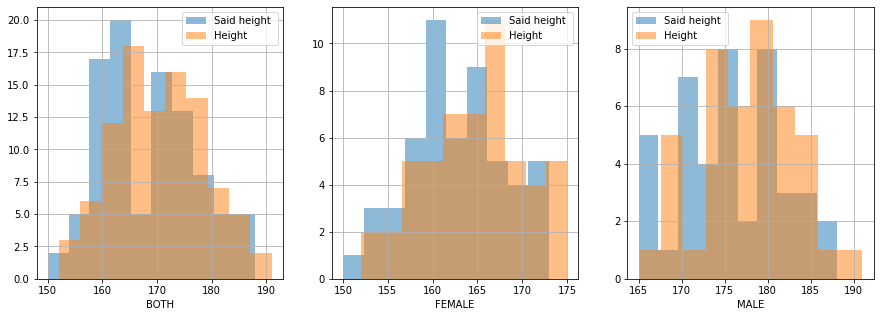

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

train['repht'].hist(bins=10, ax=axes[0], alpha=0.5)
train['height'].hist(bins=10, ax=axes[0], alpha=0.5)

train[train.sex == 1].repht.hist(bins=10, ax=axes[1], alpha=0.5)
train[train.sex == 1].height.hist(bins=10, ax=axes[1], alpha=0.5)

train[train.sex == 0].repht.hist(bins=10, ax=axes[2], alpha=0.5)
train[train.sex == 0].height.hist(bins=10, ax=axes[2], alpha=0.5)

s1 = ['Said height ', 'Height ']
s2 = ['BOTH', 'FEMALE', 'MALE']

for j, sex in enumerate(s2):
    axes[j].set_xlabel(sex)
    axes[j].legend(s1)

#### д) Постройте генератор данных (sex, height, weight).

In [24]:
class PointGenerator:
    
    def __init__(self, pw=None, mw=(None, None), 
                 mh=(None, None), cv=(None, None)):
        self.p_woman = pw
        self.mean_weight = {
            'woman': mw[0],
            'man': mw[1]
        }
        self.mean_height = {
            'woman': mh[0],
            'man': mh[1]
        }
        self.covariance = {
            'woman': cv[0],
            'man': cv[1]
        }
    
    
    def fit(self, X):
        self.p_woman = len(X[X.sex == 1]) / len(X)
        self.mean_weight['woman'] = X[X.sex == 1].weight.mean(axis=0)
        self.mean_weight['man'] = X[X.sex == 0].weight.mean(axis=0)
        self.mean_height['woman'] = X[X.sex == 1].height.mean(axis=0)
        self.mean_height['man'] = X[X.sex == 0].height.mean(axis=0)
        a = list(X[X.sex == 1].weight)
        b = list(X[X.sex == 1].height)
        self.covariance['woman'] = np.cov(np.array([a, b]))
        c = list(X[X.sex == 0].weight)
        d = list(X[X.sex == 0].height)
        self.covariance['man'] = np.cov(np.array([c, d]))
        
        
    def sample_sex(self):
        return int(sts.bernoulli.rvs(p=self.p_woman, size=1))
    
    def sample_wh(self, sex):
        if sex == 1:
            s = 'woman'
        elif sex == 0:
            s = 'man'
        mean = np.array([self.mean_weight[s],
                         self.mean_height[s]])
        cov = self.covariance[s]
        rand_val = sts.multivariate_normal.rvs(mean=mean, cov=cov, size=1)
        return int(rand_val[0]), int(rand_val[1])
        
        
    def generate_points(self, n_points):
        result_sex = []
        result_weight = []
        result_height = []
        for i in range(n_points):
            sex = self.sample_sex()
            result_sex.append(sex)
            weight, height = self.sample_wh(sex)
            result_weight.append(weight)
            result_height.append(height)
        return pd.DataFrame({'sex': result_sex, 
                             'weight': result_weight,
                             'height': result_height})
    
    
    def log_likelihood(self, X):
        X = np.array(X)
        
        X_man = X[X[:, 0] == 0][:, 1:3]
        prob_sex_man = (1 - self.p_woman)
        mean = np.array([self.mean_weight['man'],
                         self.mean_height['man']])
        cov = self.covariance['man']
        prob_wh_man = sts.multivariate_normal.pdf(X_man, mean=mean, cov=cov)
        
        X_woman = X[X[:, 0] == 1][:, 1:3]
        prob_sex_woman = self.p_woman
        mean = np.array([self.mean_weight['woman'],
                         self.mean_height['woman']])
        cov = self.covariance['woman']
        prob_wh_woman = sts.multivariate_normal.pdf(X_woman, mean=mean, cov=cov)
        likelihood = (np.log(prob_wh_man).sum() + 
                      np.log(prob_wh_woman).sum() +
                      np.log(prob_sex_man) * len(X_man) +
                      np.log(prob_sex_woman) * len(X_woman))
        return likelihood
    
    def mean_log_likelihood(self, X):
        return self.log_likelihood(X) / len(X)

Проверим, что всё работает правильно. Вычислим mean_log_likelihood для обучающей и тестовой выборок.

In [25]:
pg = PointGenerator()
pg.fit(train)
generated_data = pg.generate_points(100)
print('Усредненный логарифм правдоподобия для')
print('\t1) обучающей выборки:', str(pg.mean_log_likelihood(train)))
print('\t2) тестовой выборки:', str(pg.mean_log_likelihood(test)))
print('\t3) сгенерированной выборки:', str(pg.mean_log_likelihood(generated_data)))

Усредненный логарифм правдоподобия для
	1) обучающей выборки: -7.068984247447832
	2) тестовой выборки: -7.247909344543618
	3) сгенерированной выборки: -7.054284940644715


Значения достаточно близкие друг к другу, значит генератор построен верно. Визуализируем выборки.

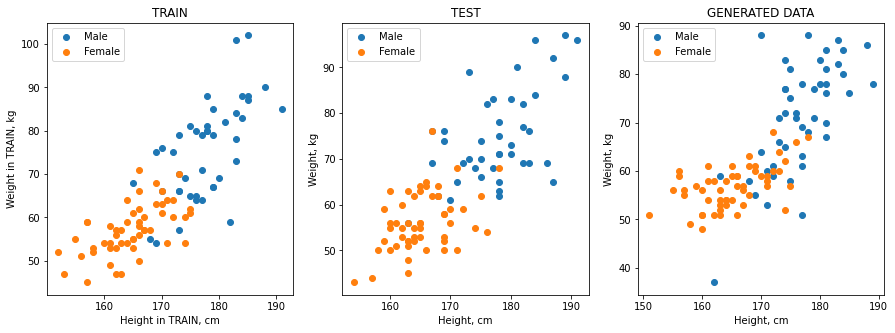

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].scatter(train[train.sex == 0].height, train[train.sex == 0].weight)
axes[0].scatter(train[train.sex == 1].height, train[train.sex == 1].weight)
axes[0].set_xlabel('Height in TRAIN, cm')
axes[0].set_ylabel('Weight in TRAIN, kg')
axes[0].legend(['Male', 'Female'])
axes[0].set_title('TRAIN')

axes[1].scatter(test[test.sex == 0].height, test[test.sex == 0].weight)
axes[1].scatter(test[test.sex == 1].height, test[test.sex == 1].weight)
axes[1].set_xlabel('Height, cm')
axes[1].set_ylabel('Weight, kg')
axes[1].legend(['Male', 'Female'])
axes[1].set_title('TEST')

axes[2].scatter(generated_data[generated_data.sex == 0].height, generated_data[generated_data.sex == 0].weight)
axes[2].scatter(generated_data[generated_data.sex == 1].height, generated_data[generated_data.sex == 1].weight)
axes[2].set_xlabel('Height, cm')
axes[2].set_ylabel('Weight, kg')
axes[2].legend(['Male', 'Female'])
axes[2].set_title('GENERATED DATA')

plt.show()

### Задание 2

#### а) Обучите градиентным спуском линейную модель и визуализируйте минимизируемый критерий.

In [27]:
X = train  
x1 = np.array(X.loc[:, 'height']).reshape(-1, 1)
y = np.array(X.loc[:, 'weight']).flatten() 
scaler = StandardScaler()
x1_scaled = scaler.fit_transform(x1) 
X = np.hstack((np.ones((x1_scaled.shape[0], 1)), x1_scaled))  

In [28]:
def model_error(w, X, y):
    return 1 / len(X) * np.sum(np.square(y - X.dot(w).flatten()))

In [32]:
def get_gradient(w, X, y):
    return (-1 / len(X)) * (y - X.dot(w).flatten()).dot(X)

w = np.array([-40, -20])
alpha = 0.5
tolerance = 1e-3

w_series = [w, ]
errors = [model_error(w, X, y), ]

iterations = 1
for i in range(200):
    gradient = get_gradient(w, X, y)
    new_w = w - alpha * gradient
    
    w_series.append(new_w)
    errors.append(model_error(new_w, X, y))
 
    if np.linalg.norm(new_w - w) < tolerance:
        print('Градиентный спуск завершен.\nЗначение b =', 
              str(new_w[0]), '\nЗначение w1 =', str(new_w[1]), 
              '\nСреднеквадратичная ошибка:', str(errors[-1]),
              '\nКоличество итераций:', str(iterations))
        break
    
    iterations += 1
    w = new_w

Градиентный спуск завершен.
Значение b = 65.38461263974507 
Значение w1 = 10.072234229703966 
Среднеквадратичная ошибка: 52.9490137549553 
Количество итераций: 17


In [33]:
b_sample = np.linspace(-50, 150, 201)
w1_sample = np.linspace(-50, 50, 101)

B, W1 = np.meshgrid(b_sample, w1_sample)

mses = np.zeros(B.shape)
for i, w1 in enumerate(w1_sample):
    for j, b in enumerate(b_sample):
        w_ = np.array([b, w1])        
        mses[i, j] = model_error(w_, X, y)

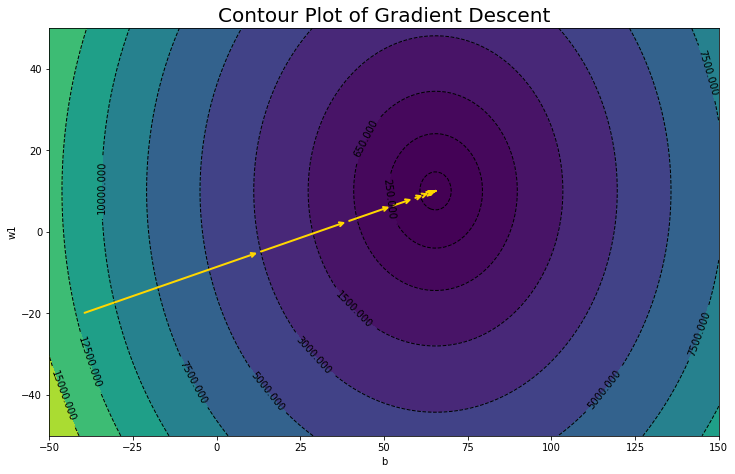

In [34]:
plt.figure(figsize=(12, 7.5))
levels=[53, 75, 250, 650, 1500, 3000, 5000, 7500, 10000, 12500, 15000, 20000]
cp = plt.contour(b_sample, w1_sample, mses, levels, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
plt.contourf(b_sample, w1_sample, mses, levels)
plt.xlabel('b')
plt.ylabel('w1')
plt.title("Contour Plot of Gradient Descent", fontsize=20)

w_path = np.array(w_series)
for i in range(len(w_series) - 1):
    plt.annotate('', xy=w_path[i + 1, :], xytext=w_path[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'gold', 'lw': 2},
                 va='center', ha='center')
plt.show()